# Node identifier: Machine Learning approach

## Preparation

In [44]:
import matplotlib.pyplot as plt
import pickle
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [45]:
# Load train and test set
path = 'C:/Users/User/Desktop/Assignatures/Synthesis project/GraphAnomaly/dades_arnau/'

In [71]:
# Use both splits
with open(path + 'balanced_train.pkl', 'rb') as f:
    train_bal = pickle.load(f)
with open(path + 'balanced_test.pkl', 'rb') as f:
    test_bal = pickle.load(f)

with open(path + 'sequential_train.pkl', 'rb') as f:
    train_seq = pickle.load(f)
with open(path + 'sequential_validation.pkl', 'rb') as f:
    test_seq = pickle.load(f)

In [72]:
# Separate labels
def separate_labels(train_set, test_set):
    train_set = train_set.loc[train_set['class'].isin([0, 1])] # Drop unknown
    y_train = list(train_set['class'])
    X_train = train_set.drop(columns=['class'])

    test_set = test_set.loc[test_set['class'].isin([0, 1])] # Drop unknown
    y_test = list(test_set['class'])
    X_test = test_set.drop(columns=['class'])

    return X_train, y_train, X_test, y_test

In [73]:
X_train_bal, y_train_bal, X_test_bal, y_test_bal = separate_labels(train_bal, test_bal)
X_train_seq, y_train_seq, X_test_seq, y_test_seq = separate_labels(train_seq, test_seq)

## Models

In [74]:
def train_model(model, X_train, y_train, X_test, y_test):
    # Train
    model.fit(X_train, y_train)

    # Evaluate
    y_pred = model.predict(X_test)

    # Display results. Except for the accuracy, the others compute the metric for the ilicit class
    print(f"Testing {model}...\n")
    accuracy = round(accuracy_score(y_test, y_pred), 4)
    print("Accuracy: {:.2f}%".format(accuracy * 100))
    precision = round(precision_score(y_test, y_pred, pos_label=0), 4)
    print("Precision: {:.2f}%".format(precision * 100))
    recall = round(recall_score(y_test, y_pred, pos_label=0), 4)
    print("Recall: {:.2f}%".format(recall * 100))
    f1 = round(f1_score(y_test, y_pred, pos_label=0),4)
    print("F1 Score: {:.2f}%".format(f1 * 100))

    # Confusion matrix
    cm = confusion_matrix(y_test, y_pred, labels=[0, 1])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Ilicit', 'Licit'])
    disp.plot()
    plt.title(model)
    plt.show()

### Balanced split

Testing DecisionTreeClassifier()...

Accuracy: 96.43%
Precision: 91.50%
Recall: 90.82%
F1 Score: 91.16%


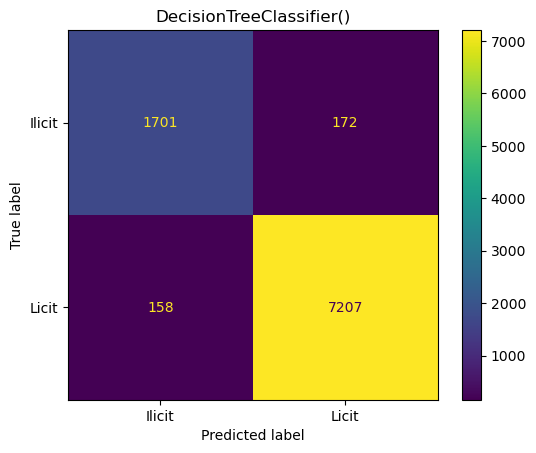

In [75]:
train_model(DecisionTreeClassifier(), X_train_bal, y_train_bal, X_test_bal, y_test_bal)

Testing RandomForestClassifier()...

Accuracy: 98.31%
Precision: 99.37%
Recall: 92.26%
F1 Score: 95.68%


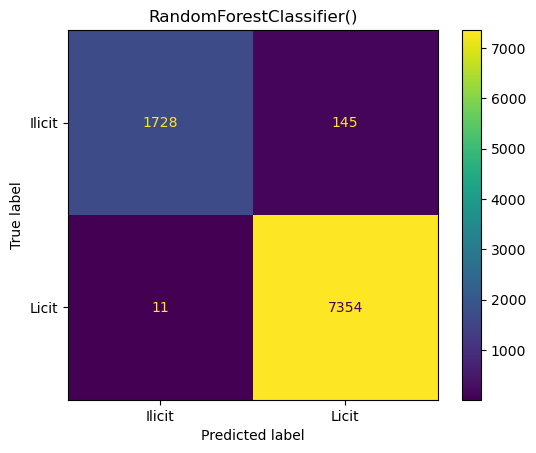

In [76]:
train_model(RandomForestClassifier(), X_train_bal, y_train_bal, X_test_bal, y_test_bal)

### Sequential split

Testing DecisionTreeClassifier()...

Accuracy: 89.77%
Precision: 53.14%
Recall: 78.09%
F1 Score: 63.24%


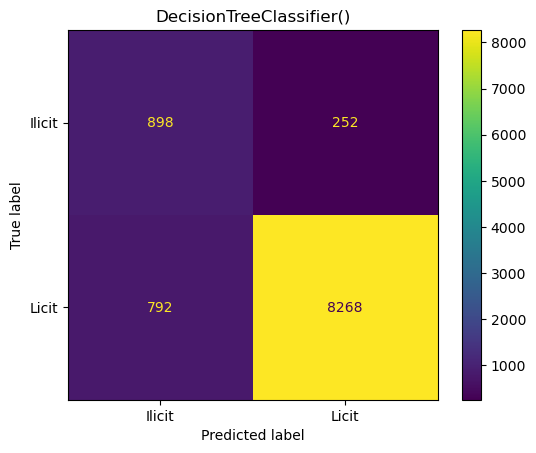

In [77]:
train_model(DecisionTreeClassifier(), X_train_seq, y_train_seq, X_test_seq, y_test_seq)

Testing RandomForestClassifier()...

Accuracy: 98.62%
Precision: 96.76%
Recall: 90.78%
F1 Score: 93.67%


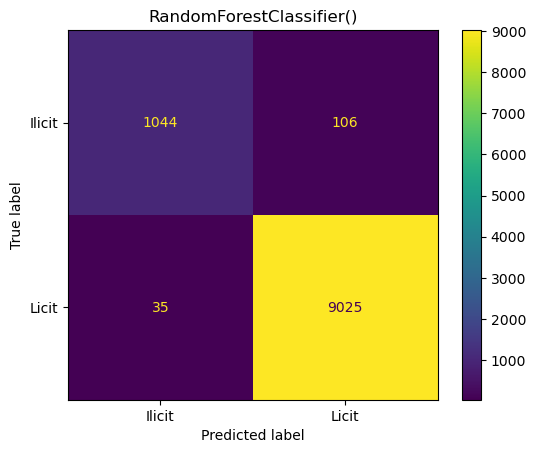

In [78]:
train_model(RandomForestClassifier(), X_train_seq, y_train_seq, X_test_seq, y_test_seq)